In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import os


for dirname, _, filenames in os.walk('~/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [90]:
df = pd.read_csv('~/kaggle/input/london_metro_stations.csv')
# Extract lines
names = list(pd.unique(df.Line))
df['Line'] = list(map( lambda v : names.index(v), df['Line'] ))
df.head()

,Station_index,English_name,Line_Neighbors,Line,Latitude,Longitude,Transfers
0,1,Acton Town,2,0,51.5028,-0.2801,4
1,2,Acton Town,"1,3",1,51.5028,-0.2801,1
2,3,Alperton,"2,4",1,51.5407,-0.2997,NaN
3,4,Arnos Grove,"3,5",1,51.6164,-0.1331,NaN
4,5,Arsenal,"4,6",1,51.5586,-0.1059,NaN


In [91]:
My_Line_Colors = {
    0:'#000000',
    1:'#EF161E',
    2:'#2DBE2C',
    3:'#0078BE',
    4:'#00BFFF',
    5:'#8D5B2D',
    6:'#ED9121',
    7:'#800080',
    8:'#FFD702',
    9:'#999999',
    10:'#99CC00',
    11:'#82C0C0',
    12:'#A1B3D4',
    13:'#00008B',
    14:'#FFC0CB',
    15:'#DE64A1',
    16:'#03795F',
    17:'#27303F',
    18:'#AC1753'
}

colors = []
for i in range(1, 19):
    colors.append(My_Line_Colors[i])

In [92]:
my_stations = []
edges = []

for index, row in df.iterrows():
    
    new_line = (row['Station_index'], row['English_name'], row['Line'], (row['Longitude'], row['Latitude']))
    my_stations.append(new_line)
    for i in str(row['Line_Neighbors']).split(","):
        edges.append((row['Station_index'], int(i)))

In [93]:
transfers = []
for index, row in df.iterrows():
    for i in str(row['Transfers']).split(','):
        if i == 'nan':
            continue
        transfers.append((row['Station_index'], int(i)))

121
167
{1: 0.005350917884646433, 2: 0.005449989831337343, 3: 0.005350917884646433, 4: 0.007550408362581427, 5: 0.004939695240232425, 6: 0.006719672351336213, 7: 0.005581635819598396, 8: 0.003270820771716572, 9: 0.004854111005602313, 10: 0.003514790469406057, 11: 0.005841672491888583, 12: 0.008224654467488879, 13: 0.008038423560630784, 14: 0.009439613773267226, 15: 0.006801616337558806, 16: 0.0068219641246189, 17: 0.004340256176659968, 18: 0.006728479051004273, 19: 0.008572615497020833, 20: 0.004649409597006601, 21: 0.00590778159307768, 22: 0.00606576333511227, 23: 0.010123088149209928, 24: 0.004764974751835597, 25: 0.007631703185439697, 26: 0.004908844910801232, 27: 0.009518363134496688, 28: 0.0035038313503848273, 29: 0.0048566932435728525, 30: 0.004907692790522767, 31: 0.006237869275940604, 32: 0.004736862697458111, 33: 0.004892501256086037, 34: 0.004964525738584695, 35: 0.006573999053996681, 36: 0.005020633454843209, 37: 0.004925388940814395, 38: 0.007632511990415721, 39: 0.01201328

NetworkXError: Node 122 has no position.

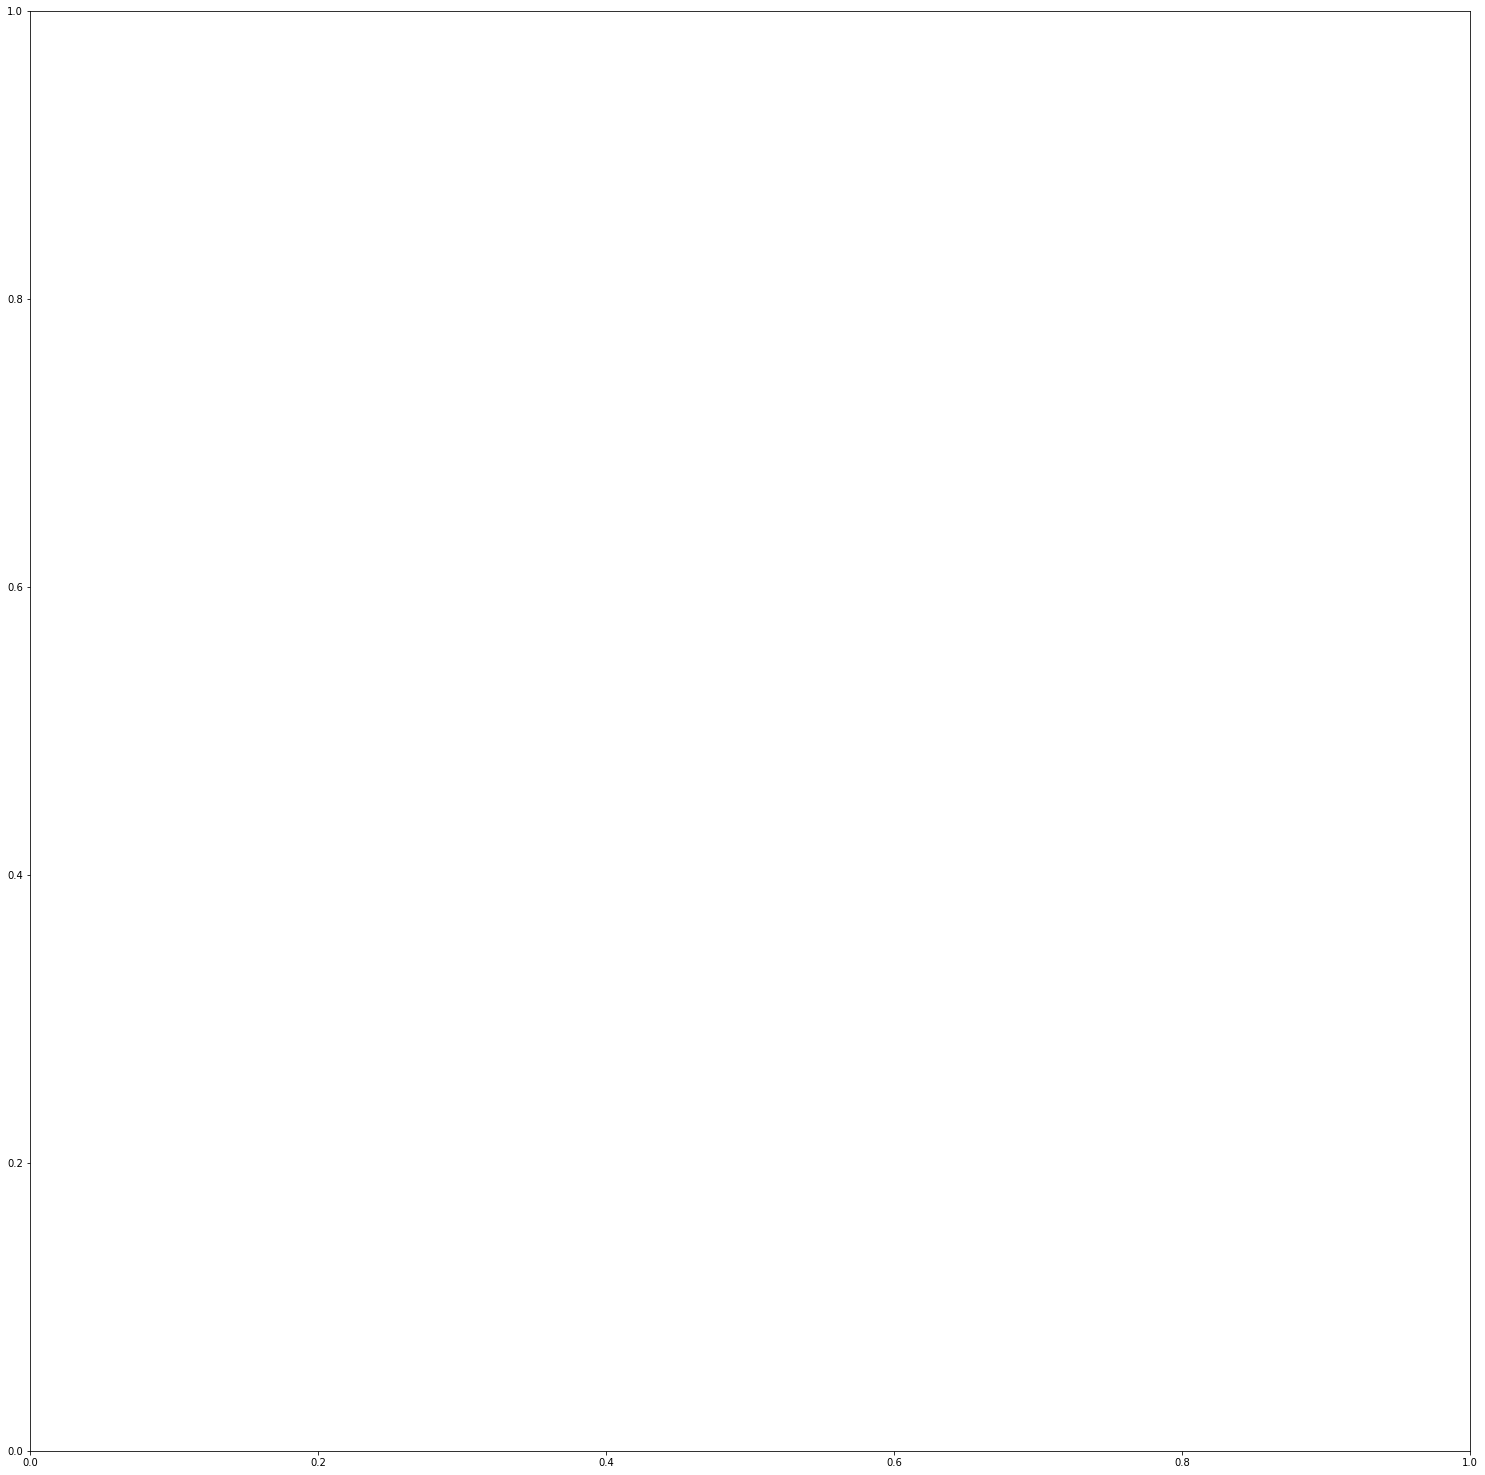

In [97]:
stations = my_stations

# Create graph
G = nx.Graph()

# Add stations and lines
list_of_nodes = [(s[0], {'name': s[1], 'line': s[2], 'pos': s[3]}) for s in stations]
print(len(list_of_nodes))
G.add_nodes_from(list_of_nodes)

# Add edges + transfers
G.add_edges_from(edges + transfers)

# Pagerank
pr = nx.pagerank(G)
print(len(pr))
print(pr)

# Visualize
pos = {node[0]: node[1]['pos'] for node in list_of_nodes}
node_colors = [node[1]['line'] for node in list_of_nodes]
edge_colors = [G[u][v].get('color', 'black') for u, v in G.edges()]

# Map line colors to numerical values
line_colors = My_Line_Colors
node_colors = [line_colors[color] for color in node_colors]
print(len(node_colors))

# Get top and create lables
# n = 50
# top = sorted(list(map(lambda k: (k, stations[k-1][1], pr[k]), pr)), key=lambda x: x[2], reverse=True)[0:n]
# labels = dict(list(map(lambda t: (t[0], t[1]), top)))

plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, node_size=200000 * np.array(list(pr.values())), 
                # labels=labels,
                node_color=node_colors, edge_color=edge_colors, font_weight='bold')
plt.xlim(df.Longitude.min() - 0.01, df.Longitude.max() + 0.01)
plt.ylim(df.Latitude.min() - 0.01, df.Latitude.max() + 0.01)
plt.show()

In [75]:
print(*top, sep="\n")

NameError: name 'top' is not defined